<span style = "font-family:'impact';color:#561ddb;font-size:3rem"> Statistics Homework 4 </span>

<span style = "font-size:16px;font-family:'papyrus';"> ChatGPT chatlog: https://chatgpt.com/share/66ff0c36-c398-800f-b240-12503f1742d7 </span>

1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

While "standard error of mean"(SEM) and "standard deviation" of the original data both measure variability, standard deviation measures the variability of **individual data points** on a distribution and SEM measures the how close the **sample mean** is to the **population mean**. Moreover SEM is found by taking the standard deviation of the **sample mean** from a **sampling distribution** and as sample size increases, SEM decreases (increasing in precision).

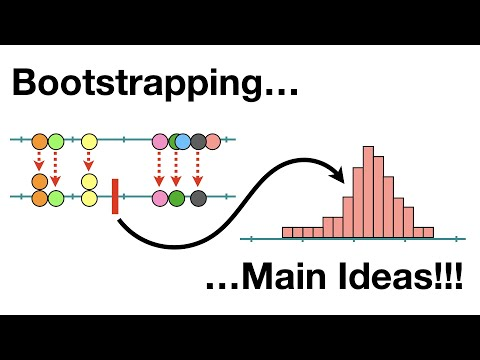

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.
    1. *What is the process of bootstrapping?* </br>
    The process of bootstrapping involves randomly drawing values from a sample and repeating that action over and over and over again. Each time after you draw a sample, keep track of the statistic you want for your experiment such as the mean, median, standard deviation (spread of the distribution), etc. </p>
    2. *What is the main purpose of bootstrapping?* </br>
    The main purpose of bootstrapping is to determine how accurate a guess is when we don't have much data to work with. Imagine if you want to get a test score average from a class, but you only recieve handful of them. Instead of having the class redo the test, you bootstrap, meaning randomly selecting the known test scores while returning the scores into the existing pile of test scores in each draw and repeating it over and over again until you have a large amount of piles, say 10,000 of them, while keeping track of each piles' mean. Then you create a histogram out of the means you counted and find the mean of the histogram. By nature, the middle 95% of the histogram you found has a high likeliehood of covering the test score mean of the entire class, which tells you with a level of certainty how close the groups' average score is to the class average score. </p>
    3. *If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?* </br>
    Use sample size n to bootstrap, while keeping count of the means, create a distribution from the means, find the mean of the distribution and take the middle 95%, giving you the confidence interval and by extension how accurate your guess is to the population mean. 
 

8. Complete the following assignment (listed in stat130 github).
## Vaccine Data Analysis Assignment
### Problem Introduction
The goal is to determine whether the new vaccine developed by AliTech improves health outcomes. Specifically, we'll compare patients' initial health scores with their final health scores to see if there's a statistically significant improvement. The null hypothesis in this context is that the vaccine has no effect on the health scores, meaning the initial and final scores are not significantly different. </p>

### Null Hypothesis of "No Effect"
The null hypothesis (H₀) is that there is no change in health scores due to the vaccine, implying that the vaccine is ineffective. Conversely, the alternative hypothesis (H₁) is that the health scores have improved, indicating that the vaccine is effective.</p>

### Data Visualization
Import the data from the CSV file and use libraries like pandas and matplotlib for data analysis and visualization.
Create side-by-side box plots or a bar chart to compare initial vs. final health scores across all patients. This will help provide initial insights into whether there is an overall change in health scores.
Quantitative Analysis</br>
We'll use bootstrapping to estimate whether the mean difference in health scores before and after taking the vaccine is significantly different from zero.</p>

### Methodology Code and Explanation:

In [3]:
#1. Import necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

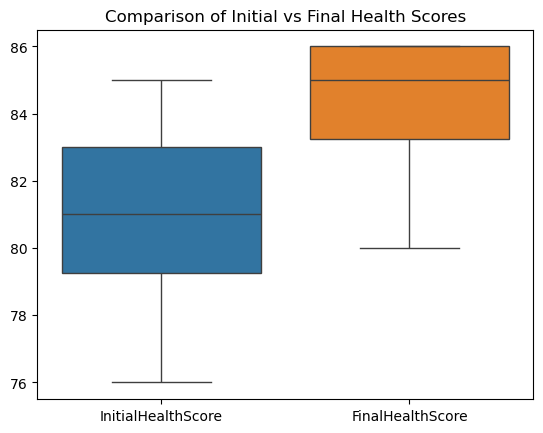

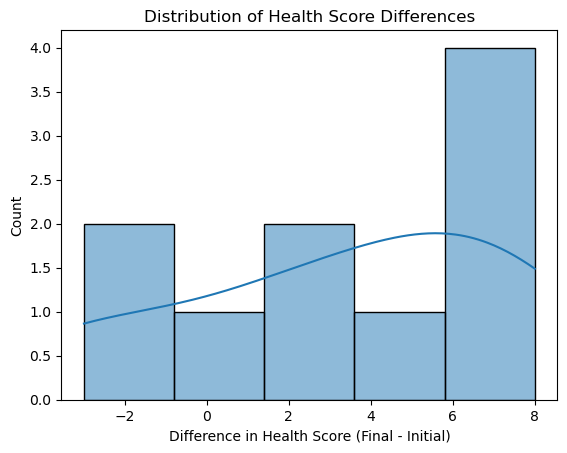

95% Confidence Interval: [0.9, 5.6]


In [9]:
#2. Load the data:
np.random.seed(42)  # To ensure reproducibility
df = pd.read_csv('vaccine_data.csv')

#3. Calculate the difference between final and initial health scores:
df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

#4. Visualize the health scores and their differences:
sns.boxplot(data=df[['InitialHealthScore', 'FinalHealthScore']])
plt.title('Comparison of Initial vs Final Health Scores')
plt.show()

sns.histplot(df['ScoreDifference'], kde=True)
plt.title('Distribution of Health Score Differences')
plt.xlabel('Difference in Health Score (Final - Initial)')
plt.show()

#5. Perform bootstrapping:
# Number of bootstrap samples
n_iterations = 10000
# Container to store bootstrap means
boot_means = []

for _ in range(n_iterations):
    boot_sample = df['ScoreDifference'].sample(frac=1, replace=True)
    boot_means.append(boot_sample.mean())

# Calculate the 95% confidence interval
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)

print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")

### Supporting Visualizations

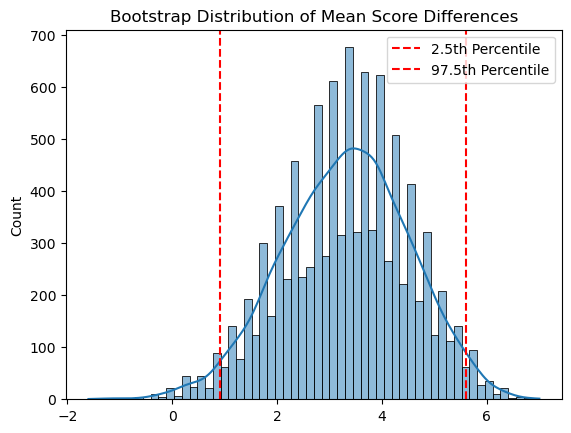

In [8]:
sns.histplot(boot_means, kde=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='2.5th Percentile')
plt.axvline(upper_bound, color='red', linestyle='--', label='97.5th Percentile')
plt.title('Bootstrap Distribution of Mean Score Differences')
plt.legend()
plt.show()

### Findings and Discussion
If the 95% confidence interval for the bootstrap mean difference does not include zero, we can conclude that there is evidence that the vaccine has a significant effect on health scores.
For example, if the interval is [1.2, 5.6], it indicates that the average improvement is positive, suggesting that the vaccine is effective.
However, if the interval contains zero, it means we fail to reject the null hypothesis, suggesting insufficient evidence that the vaccine makes a significant difference.</p>

### Conclusion regarding a Null Hypothesis of "No Effect"
Based on the bootstrap analysis and confidence interval, state whether there is enough evidence to reject the null hypothesis of "no effect."</p>

* If the CI doesn't contain zero, conclude that the vaccine appears to improve health scores.</br>
* If the CI contains zero, conclude that we can't prove the vaccine's effectiveness.</br>

### Further Considerations
Consider the **sample size:** The small dataset may limit the reliability of the conclusions.</br>
**Additional factors:** Other potential health factors (like pre-existing conditions) aren't considered, which may influence results. </p>
**Repeated studies:** Recommending repeated testing with larger and more diverse samples for robust conclusions.
This should provide a clear, structured approach to tackle the vaccine data analysis assignment while explaining the purpose of bootstrapping and statistical inference in accessible terms.